# netCDF and xarray

Multidimensional data is generated by models and/or observations. Metadata is crucial when we are dealing with scientific data and without it we cannot tell too much about the data. Also, it would be much easier for data scientists to work using metadata available in the datasets, such as coordinate systems, instead of working just with numpy indexing.

## netCDF

netCDF library provides Python bindings via the package `netCDF4-python`. It can be installed via conda or pip:

- `conda install -c conda-forge netcdf4 xarray cftime cartopy`

Note that this also install the netCDF C library, which includes the useful `ncdump` command.

```bash
!ncdump -h FILE.nc
```

### Examining a netCDF dataset

netCDF datasets are very similar to HDF5 files so we can reuse 90% of our knowledge. Just remember that:

- A **HDF5 File** is the equivalent of a **netCDF Dataset**.
- A **HDF5 Dataset** (aka a multidimensional array) is the equivalent of a **netCDF Variable**.
- HDF5 **attributes** are the same in netCDF.

**However** there is an important difference between the netCDF and the HDF5 data models and it relates to **netCDF dimensions** or **HDF5 data spaces**. In HDF5, the data space is a property of a dataset and the data space is not shared with other datasets. In netCDF, dimensions are the way to represent HDF5 data spaces and dimensions are shared between netCDF variables. You can read more about how netCDF uses dimensions and how it maps dimensions to HDF5 objects here:

- https://www.unidata.ucar.edu/blogs/developer/en/entry/dimensions_scales
- https://www.unidata.ucar.edu/blogs/developer/en/entry/dimension_scale2
- https://www.unidata.ucar.edu/blogs/developer/en/entry/dimension_scales_part_3
- https://www.unidata.ucar.edu/blogs/developer/en/entry/netcdf4_shared_dimensions

In [1]:
import os
import numpy as np
import netCDF4
import h5py

Download the following netCDF dataset (or download another similar file if not available):

- http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/day/pr/gn/v20190818/pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc

#### Converting a netCDF classic file into a netCDF 4 (HDF5) file

In [2]:
!ncdump -k pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc

classic


In [3]:
!nccopy -4 pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

In [4]:
!ncdump -k pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

netCDF-4


Now we can open the file with `h5py`. Let's examine the contents:

In [5]:
with h5py.File("pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4", "r") as f:
    f.visit(print)

bnds
lat
lat_bnds
lon
lon_bnds
pr
time
time_bnds


In [6]:
!h5dump -A --onlyattr=0 -p pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

HDF5 "pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4" {
GROUP "/" {
   DATASET "bnds" {
      DATATYPE  H5T_IEEE_F32BE
      DATASPACE  SIMPLE { ( 2 ) / ( 2 ) }
      STORAGE_LAYOUT {
         CONTIGUOUS
         SIZE 0
         OFFSET HADDR_UNDEF
      }
      FILTERS {
         NONE
      }
      FILLVALUE {
         FILL_TIME H5D_FILL_TIME_IFSET
         VALUE  H5D_FILL_VALUE_DEFAULT
      }
      ALLOCATION_TIME {
         H5D_ALLOC_TIME_LATE
      }
   }
   DATASET "lat" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 80 ) / ( 80 ) }
      STORAGE_LAYOUT {
         CONTIGUOUS
         SIZE 640
         OFFSET 37543
      }
      FILTERS {
         NONE
      }
      FILLVALUE {
         FILL_TIME H5D_FILL_TIME_NEVER
         VALUE  H5D_FILL_VALUE_DEFAULT
      }
      ALLOCATION_TIME {
         H5D_ALLOC_TIME_LATE
      }
   }
   DATASET "lat_bnds" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 80, 2 ) / ( 80, 2 ) }
      STORAGE_LAYOUT {
    

In [7]:
!h5dump -A pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

HDF5 "pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4" {
GROUP "/" {
   ATTRIBUTE "Conventions" {
      DATATYPE  H5T_STRING {
         STRSIZE 256;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "CF-1.7 CMIP-6.2"
      }
   }
   ATTRIBUTE "_NCProperties" {
      DATATYPE  H5T_STRING {
         STRSIZE 34;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "version=2,netcdf=4.8.1,hdf5=1.12.1"
      }
   }
   ATTRIBUTE "activity_id" {
      DATATYPE  H5T_STRING {
         STRSIZE 256;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "ScenarioMIP"
      }
   }
   ATTRIBUTE "branch_method" {
      DATATYPE  H5T_STRING {
         STRSIZE 256;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSE

netCDF contains it's own command line tools to inspect netCDF files.

In [8]:
!ncdump -h pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

      (0): "CMIP6"
      }
   }
   ATTRIBUTE "parent_source_id" {
      DATATYPE  H5T_STRING {
         STRSIZE 256;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "FGOALS-g3"
      }
   }
   ATTRIBUTE "parent_time_units" {
      DATATYPE  H5T_STRING {
         STRSIZE 256;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "days since 1850-01-01"
      }
   }
   ATTRIBUTE "parent_variant_label" {
      DATATYPE  H5T_STRING {
         STRSIZE 256;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "r1i1p1f1"
      }
   }
   ATTRIBUTE "physics_index" {
      DATATYPE  H5T_STD_I32LE
      DATASPACE  SIMPLE { ( 1 ) / ( 1 ) }
      DATA {
      (0): 1
      }
   }
   ATTRIBUTE "product" {
      DATATYPE  H5T_

         }
         DATASPACE  SCALAR
         DATA {
         (0): "DIMENSION_SCALE"
         }
      }
      ATTRIBUTE "NAME" {
         DATATYPE  H5T_STRING {
            STRSIZE 5;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_ASCII;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
         DATA {
         (0): "time"
         }
      }
      ATTRIBUTE "REFERENCE_LIST" {
         DATATYPE  H5T_COMPOUND {
            H5T_REFERENCE { H5T_STD_REF_OBJECT } "dataset";
            H5T_STD_I32LE "dimension";
         }
         DATASPACE  SIMPLE { ( 2 ) / ( 2 ) }
         DATA {
         (0): {
               ,
               0
            },
         (1): {
               ,
               0
            }
         }
      }
      ATTRIBUTE "_Netcdf4Coordinates" {
         DATATYPE  H5T_STD_I32LE
         DATASPACE  SIMPLE { ( 1 ) / ( 1 ) }
         DATA {
         (0): 0
         }
      }
      ATTRIBUTE "_Netcdf4Dimid" {
         DATATYPE  H5T_STD_I32LE

In [9]:
!ncdump -v time pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

netcdf pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231 {
dimensions:
	time = UNLIMITED ; // (365 currently)
	lat = 80 ;
	lon = 180 ;
	bnds = 2 ;
variables:
	double time(time) ;
		time:bounds = "time_bnds" ;
		time:units = "days since 2015-01-01 00:00:00" ;
		time:calendar = "365_day" ;
		time:axis = "T" ;
		time:long_name = "time" ;
		time:standard_name = "time" ;
	double time_bnds(time, bnds) ;
	double lat(lat) ;
		lat:bounds = "lat_bnds" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:long_name = "Latitude" ;
		lat:standard_name = "latitude" ;
	double lat_bnds(lat, bnds) ;
	double lon(lon) ;
		lon:bounds = "lon_bnds" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:long_name = "Longitude" ;
		lon:standard_name = "longitude" ;
	double lon_bnds(lon, bnds) ;
	float pr(time, lat, lon) ;
		pr:standard_name = "precipitation_flux" ;
		pr:long_name = "Precipitation" ;
		pr:comment = "includes both liquid and solid phases" ;
		pr:units = "kg m-2 s-1" ;
		pr:cell_meth

In [10]:
!h5dump -d time pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4

HDF5 "pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc4" {
DATASET "time" {
   DATATYPE  H5T_IEEE_F64LE
   DATASPACE  SIMPLE { ( 365 ) / ( H5S_UNLIMITED ) }
   DATA {
   (0): 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5,
   (13): 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5,
   (24): 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5,
   (35): 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5,
   (46): 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5,
   (57): 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5,
   (68): 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5,
   (79): 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5, 87.5, 88.5, 89.5,
   (90): 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5, 98.5, 99.5, 100.5,
   (101): 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5, 109.5,
   (110): 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5, 118.5,
  

### Creating a netCDF dataset

In [11]:
filename = "temperatures_1980.nc"
dims = {
    "time": 365,
    "lat": 180,
    "lon": 360
}

with netCDF4.Dataset(filename, "w") as f:
    # dimensions
    for d in dims:
        f.createDimension(d, dims[d])

    # variables
    f.createVariable(
        "time",
        "f8",
        ("time",))
    f.createVariable(
        "lat",
        "f8",
        ("lat",))
    f.createVariable(
        "lon",
        "f8",
        ("lon",))
    f.createVariable(
        "tas",
        "f8",
        list(dims.keys()),
        shuffle=True,
        fletcher32=True,
        zlib=True)
    
    f.variables["time"][:] = np.arange(dims["time"])
    f.variables["time"].setncattr("units", "days since 1980-01-01")
    f.variables["time"].setncattr("standard_name", "time")
    
    f.variables["lat"][:] = np.linspace(-90, 90, dims["lat"])
    f.variables["lat"].setncattr("units", "degrees_north")
    f.variables["lat"].setncattr("standard_name", "latitude")
    
    f.variables["lon"][:] = np.arange(dims["lon"])
    f.variables["lon"].setncattr("standard_name", "longitude")
    f.variables["lon"].setncattr("units", "degrees_east")
    
    f.variables["tas"][:] = np.random.normal(20, 10, list(dims.values()))
    f.variables["tas"].setncattr("units", "Celsius")
    f.variables["tas"].setncattr("standard_name", "surface_temperature")
    f.variables["tas"].setncattr("description", "Surface temperature at 2 meters above surface")
    
    f.setncattr("description", "Dataset of artificially generated temperatures for Data Models")
    
print("Created file {} of size {} MiB.".format(filename, os.stat(filename).st_size // 2**20))

Created file temperatures_1980.nc of size 153 MiB.


In [12]:
!ncdump -hs temperatures_1980.nc

netcdf temperatures_1980 {
dimensions:
	time = 365 ;
	lat = 180 ;
	lon = 360 ;
variables:
	double time(time) ;
		time:units = "days since 1980-01-01" ;
		time:standard_name = "time" ;
		time:_Storage = "contiguous" ;
		time:_Endianness = "little" ;
	double lat(lat) ;
		lat:units = "degrees_north" ;
		lat:standard_name = "latitude" ;
		lat:_Storage = "contiguous" ;
		lat:_Endianness = "little" ;
	double lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:_Storage = "contiguous" ;
		lon:_Endianness = "little" ;
	double tas(time, lat, lon) ;
		tas:units = "Celsius" ;
		tas:standard_name = "surface_temperature" ;
		tas:description = "Surface temperature at 2 meters above surface" ;
		tas:_Storage = "chunked" ;
		tas:_ChunkSizes = 122, 60, 120 ;
		tas:_DeflateLevel = 4 ;
		tas:_Shuffle = "true" ;
		tas:_Fletcher32 = "true" ;
		tas:_Endianness = "little" ;

// global attributes:
		:description = "Dataset of artificially generated temperatures for Data Models" 

In [13]:
!h5dump -A temperatures_1980.nc

HDF5 "temperatures_1980.nc" {
GROUP "/" {
   ATTRIBUTE "_NCProperties" {
      DATATYPE  H5T_STRING {
         STRSIZE 34;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "version=2,netcdf=4.8.1,hdf5=1.12.1"
      }
   }
   ATTRIBUTE "description" {
      DATATYPE  H5T_STRING {
         STRSIZE 62;
         STRPAD H5T_STR_NULLTERM;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "Dataset of artificially generated temperatures for Data Models"
      }
   }
   DATASET "lat" {
      DATATYPE  H5T_IEEE_F64LE
      DATASPACE  SIMPLE { ( 180 ) / ( 180 ) }
      ATTRIBUTE "CLASS" {
         DATATYPE  H5T_STRING {
            STRSIZE 16;
            STRPAD H5T_STR_NULLTERM;
            CSET H5T_CSET_ASCII;
            CTYPE H5T_C_S1;
         }
         DATASPACE  SCALAR
         DATA {
         (0): "DIMENSION_SCALE"
         }
      }

### Examining a remote netCDF dataset

In [14]:
import netCDF4
import matplotlib.pyplot as plt

In [15]:
url = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp585/r2i1p1f1/day/pr/gn/v20210318/pr_day_ACCESS-ESM1-5_ssp585_r2i1p1f1_gn_20150101-20641231.nc"
ds = netCDF4.Dataset(url, mode="r")

In [16]:
for variable in ds.variables:
    print(variable)

time
time_bnds
lat
lat_bnds
lon
lon_bnds
pr


In [17]:
time = ds.variables["time"]

print("Variable name: {}\n".format(time.name))
print("Dimensions: {}\n".format(time.dimensions))
print("Shape: {}\n".format(time.shape))

for time_attr in time.ncattrs():
    print("Attribute: {} -> {}".format(time_attr, time.getncattr(time_attr)))

Variable name: time

Dimensions: ('time',)

Shape: (18263,)

Attribute: bounds -> time_bnds
Attribute: units -> days since 1850-01-01
Attribute: calendar -> proleptic_gregorian
Attribute: axis -> T
Attribute: long_name -> time
Attribute: standard_name -> time
Attribute: _ChunkSizes -> 1


In [18]:
pr = ds.variables["pr"] # precipitation

print("Variable name: {}\n".format(pr.name))
print("Dimensions: {}\n".format(pr.dimensions))
print("Shape: {}\n".format(pr.shape))

for pr_attr in pr.ncattrs():
    print("Attribute: {} -> {}".format(pr_attr, pr.getncattr(pr_attr)))

Variable name: pr

Dimensions: ('time', 'lat', 'lon')

Shape: (18263, 145, 192)

Attribute: standard_name -> precipitation_flux
Attribute: long_name -> Precipitation
Attribute: comment -> includes both liquid and solid phases
Attribute: units -> kg m-2 s-1
Attribute: cell_methods -> area: time: mean
Attribute: cell_measures -> area: areacella
Attribute: history -> 2019-11-29T05:22:19Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20).
Attribute: missing_value -> 1.0000000200408773e+20
Attribute: _FillValue -> 1.0000000200408773e+20
Attribute: _ChunkSizes -> [  1 145 192]


In [19]:
for attr in ds.ncattrs():
    print('Attribute: {} -> {}'.format(attr, ds.getncattr(attr)))

Attribute: Conventions -> CF-1.7 CMIP-6.2
Attribute: activity_id -> ScenarioMIP
Attribute: branch_method -> standard
Attribute: branch_time_in_child -> 60265.0
Attribute: branch_time_in_parent -> 60265.0
Attribute: creation_date -> 2019-11-29T05:22:20Z
Attribute: data_specs_version -> 01.00.30
Attribute: experiment -> update of RCP8.5 based on SSP5
Attribute: experiment_id -> ssp585
Attribute: external_variables -> areacella
Attribute: forcing_index -> 1
Attribute: frequency -> day
Attribute: further_info_url -> https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.ssp585.none.r2i1p1f1
Attribute: grid -> native atmosphere N96 grid (145x192 latxlon)
Attribute: grid_label -> gn
Attribute: history -> 2019-11-29T05:22:20Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
Attribute: initialization_index -> 1
Attribute: institution -> Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia
Attribute: institution_id

In [20]:
ds.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 18263,
 'bnds': <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 145,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 192}

In [21]:
pr = ds.variables['pr']

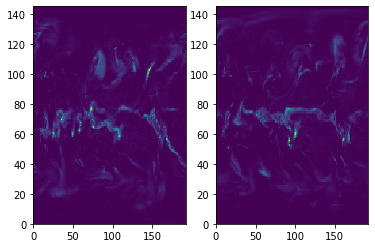

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].pcolormesh(pr[0, :, :])
axes[1].pcolormesh(pr[-1, :, :])

In [23]:
# It's important to close the file when we have finished reading from it
ds.close()

## xarray

xarray provides a library for semantic indexing (based on [CF-Conventions](https://cfconventions.org/)) and advanced operations on multidimensional arrays.

Although xarray is heavily inspired by the netCDF Data Model, it does not model Groups though they can be loaded using multiple `xarray.Dataset` objects.

In [24]:
import xarray

In [25]:
url = "http://esgf.nci.org.au/thredds/dodsC/master/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp585/r2i1p1f1/day/pr/gn/v20210318/pr_day_ACCESS-ESM1-5_ssp585_r2i1p1f1_gn_20150101-20641231.nc"
ds = xarray.open_dataset(url)

In [26]:
ds

<xarray.Dataset>
Dimensions:    (time: 18263, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2064-12-31T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     ScenarioMIP
    branch_method:                   standard
    branch_time_in_child:            60265.0
    branch_time_in_parent:           60265.0
    creation_date:                   2019-11-29T05:22:20Z
    ...                              ...
    version:                         v20191129
    cmor_version:                    3.4.0
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.10.5
    tracking_id:                     hdl:21.14100/c220040b-2638-41f0-9324-b71...
    license:                         CMIP6 model data produced by CSIRO is li...
    DODS_EXTRA.Unlimited_Dimension:  time

So, we have loaded a `xarray.Dataset` objects, which is a container for `xarray.DataArray` objects (the actual multidimensional arrays).

### Indexing data

In [27]:
# Dataset -> by name, by integer
ds.isel(time=0)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192)
Coordinates:
    time       datetime64[ns] 2015-01-01T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) datetime64[ns] 2015-01-01 2015-01-02
    lat_bnds   (lat, bnds) float64 -90.0 -89.38 -89.38 ... 89.38 89.38 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     ScenarioMIP
    branch_method:                   standard
    branch_time_in_child:            60265.0
    branch_time_in_parent:           60265.0
    creation_date:                   2019-11-29T05:22:20Z
    ...                              ...
    version:                         v20191129
    cmor_version:                    3.4.0
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.10.5
    tracking_id:                     hdl:21.14100/c220040b-2638-41f0-9324-b71...
    license:                         CMIP6 model data produced by CSIRO is li...
    DODS_EXTRA.Unlimited_Dimension:  time

In [28]:
# Dataset -> by name, by label
ds.sel(time='2015-01-01T12:00:00')

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192)
Coordinates:
    time       datetime64[ns] 2015-01-01T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) datetime64[ns] 2015-01-01 2015-01-02
    lat_bnds   (lat, bnds) float64 -90.0 -89.38 -89.38 ... 89.38 89.38 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    pr         (lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     ScenarioMIP
    branch_method:                   standard
    branch_time_in_child:            60265.0
    branch_time_in_parent:           60265.0
    creation_date:                   2019-11-29T05:22:20Z
    ...                              ...
    version:                         v20191129
    cmor_version:                    3.4.0
    _NCProperties:                   version=2,netcdf=4.6.2,hdf5=1.10.5
    tracking_id:                     hdl:21.14100/c220040b-2638-41f0-9324-b71...
    license:                         CMIP6 model data produced by CSIRO is li...
    DODS_EXTRA.Unlimited_Dimension:  time

In [29]:
pr = ds['pr']

In [30]:
# DataArray -> by position, by integer
pr[0,:,:]

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[5.311676e-06, 5.311676e-06, 5.311676e-06, ..., 5.311676e-06,
        5.311676e-06, 5.311676e-06],
       [5.994646e-06, 6.116161e-06, 6.115756e-06, ..., 6.687788e-06,
        6.271856e-06, 5.979109e-06],
       [3.095105e-06, 2.916972e-06, 2.707544e-06, ..., 3.489409e-06,
        3.482817e-06, 3.317540e-06],
       ...,
       [3.288953e-07, 3.325055e-07, 3.478516e-07, ..., 3.203715e-07,
        3.204806e-07, 3.197741e-07],
       [2.894308e-07, 2.834419e-07, 2.835646e-07, ..., 3.143200e-07,
        2.963063e-07, 2.863495e-07],
       [4.597242e-07, 4.597242e-07, 4.597242e-07, ..., 4.597242e-07,
        4.597242e-07, 4.597242e-07]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-29T05:22:19Z altered by CMOR: replaced missing va...
    _ChunkSizes:    [  1 145 192]

In [31]:
# DataArray -> by position, by label
pr.loc['2015-01-01T12:00:00', :, :]

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[5.311676e-06, 5.311676e-06, 5.311676e-06, ..., 5.311676e-06,
        5.311676e-06, 5.311676e-06],
       [5.994646e-06, 6.116161e-06, 6.115756e-06, ..., 6.687788e-06,
        6.271856e-06, 5.979109e-06],
       [3.095105e-06, 2.916972e-06, 2.707544e-06, ..., 3.489409e-06,
        3.482817e-06, 3.317540e-06],
       ...,
       [3.288953e-07, 3.325055e-07, 3.478516e-07, ..., 3.203715e-07,
        3.204806e-07, 3.197741e-07],
       [2.894308e-07, 2.834419e-07, 2.835646e-07, ..., 3.143200e-07,
        2.963063e-07, 2.863495e-07],
       [4.597242e-07, 4.597242e-07, 4.597242e-07, ..., 4.597242e-07,
        4.597242e-07, 4.597242e-07]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-29T05:22:19Z altered by CMOR: replaced missing va...
    _ChunkSizes:    [  1 145 192]

In [32]:
# DataArray -> by name, by integer
pr.isel(time=-1)

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[6.304699e-07, 6.304699e-07, 6.304699e-07, ..., 6.304699e-07,
        6.304699e-07, 6.304699e-07],
       [3.967175e-07, 4.132820e-07, 4.348757e-07, ..., 3.967514e-07,
        3.731530e-07, 3.821206e-07],
       [3.316803e-07, 3.635605e-07, 4.126933e-07, ..., 4.409544e-07,
        3.398064e-07, 3.258060e-07],
       ...,
       [7.399060e-06, 6.843391e-06, 6.496898e-06, ..., 9.628073e-06,
        8.981402e-06, 8.073821e-06],
       [2.215649e-06, 2.056152e-06, 1.994775e-06, ..., 2.482294e-06,
        2.336689e-06, 2.261956e-06],
       [6.215337e-06, 6.215337e-06, 6.215337e-06, ..., 6.215337e-06,
        6.215337e-06, 6.215337e-06]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2064-12-31T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-29T05:22:19Z altered by CMOR: replaced missing va...
    _ChunkSizes:    [  1 145 192]

In [33]:
# DataArray -> by name, by label
pr.sel(time='2015-01-01T12:00:00')

<xarray.DataArray 'pr' (lat: 145, lon: 192)>
array([[5.311676e-06, 5.311676e-06, 5.311676e-06, ..., 5.311676e-06,
        5.311676e-06, 5.311676e-06],
       [5.994646e-06, 6.116161e-06, 6.115756e-06, ..., 6.687788e-06,
        6.271856e-06, 5.979109e-06],
       [3.095105e-06, 2.916972e-06, 2.707544e-06, ..., 3.489409e-06,
        3.482817e-06, 3.317540e-06],
       ...,
       [3.288953e-07, 3.325055e-07, 3.478516e-07, ..., 3.203715e-07,
        3.204806e-07, 3.197741e-07],
       [2.894308e-07, 2.834419e-07, 2.835646e-07, ..., 3.143200e-07,
        2.963063e-07, 2.863495e-07],
       [4.597242e-07, 4.597242e-07, 4.597242e-07, ..., 4.597242e-07,
        4.597242e-07, 4.597242e-07]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-29T05:22:19Z altered by CMOR: replaced missing va...
    _ChunkSizes:    [  1 145 192]

Using what we have learnt so far, try to plot surface temperature using the [nearest method](http://xarray.pydata.org/en/stable/indexing.html#nearest-neighbor-lookups) to look up coordinate values.

In [34]:
import cftime

dates = [
    cftime.datetime(2015, 1, 1),
    cftime.datetime(2020, 1, 1),
    cftime.datetime(2030, 1, 1),
]

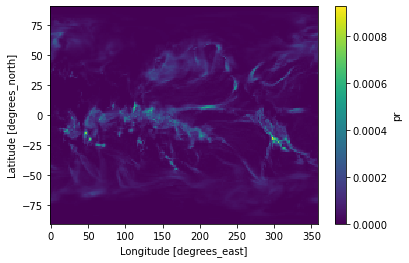

In [35]:
pr.sel(time=dates, method="nearest").mean("time").plot()

### Plotting with cartopy

You need to install `cartopy` with `conda install -c conda-forge cartopy`.

    `cartopy` can kill the kernel (it is a bug). It may work by installing with `pip3 install shapely cartopy --no-binary shapely --no-binary cartopy`.

C:\Users\sergr\miniconda3\envs\PythonJupyter\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\sergr\miniconda3\envs\PythonJupyter\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\sergr\miniconda3\envs\PythonJupyter\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\se

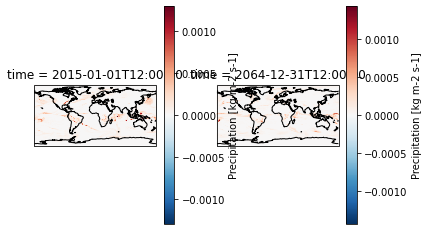

In [36]:
import cartopy

fig, axes = plt.subplots(nrows=1, ncols=2,
                         subplot_kw={'projection': cartopy.crs.PlateCarree()})

for j in range(2):
    axes[j].coastlines(lw=1)

ds['pr'].isel(time=0).plot(ax=axes[0])
ds['pr'].isel(time=-1).plot(ax=axes[1])

### Using xarray to examine our custom temperatures dataset

In [37]:
import xarray

In [38]:
filename = "temperatures_1980.nc"
ds = xarray.open_dataset(filename)

In [39]:
ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-12-30
  * lat      (lat) float64 -90.0 -88.99 -87.99 -86.98 ... 86.98 87.99 88.99 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    tas      (time, lat, lon) float64 ...
Attributes:
    description:  Dataset of artificially generated temperatures for Data Models

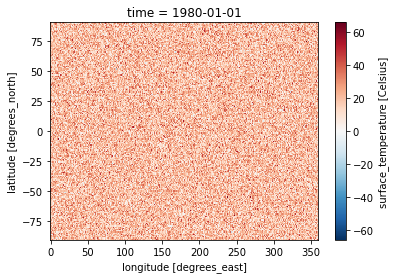

In [40]:
ds["tas"][0].plot()

In [41]:
ds["tas"].mean("time")

<xarray.DataArray 'tas' (lat: 180, lon: 360)>
array([[19.43941873, 19.88653312, 19.62439807, ..., 19.96076028,
        19.72488323, 19.63237207],
       [20.70118801, 19.64299387, 18.92400038, ..., 19.65834586,
        19.54548802, 19.80739871],
       [20.18045359, 20.17941279, 19.59270444, ..., 20.02542013,
        20.42781438, 19.94777227],
       ...,
       [19.18653041, 20.17215103, 19.83234928, ..., 20.44169149,
        19.86149127, 19.8219007 ],
       [19.91759135, 20.08248657, 20.07041063, ..., 20.42956671,
        19.80892776, 20.36135343],
       [19.99243218, 20.33657448, 19.86518896, ..., 20.03786077,
        20.41405594, 20.92504721]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.99 -87.99 -86.98 ... 86.98 87.99 88.99 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [42]:
ds.close()

# Exercises

The [Coupled Model Intercomparison Project Phase 6 (CMIP6)](https://pcmdi.llnl.gov/CMIP6/) is the 6th phase of the CMIP project, a global initiative where modelling institutions around the globe share the results of their simulations (climate models), in order to make them availble worldwide for scientific research.

Find in the portal of the [ESGF federation](https://esgf-node.llnl.gov/search/cmip6/?mip_era=CMIP6&experiment_id=ssp585&variable_id=tas,pr&frequency=day) the following files and download them to your computer using the `HTTP Download` link (use the `Variable`, `Frequency`, `Experiment ID` and `Variant Label` filters on the left panel to filter results) e.g.:

- pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc
- pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc
- pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc
- pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc
- tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc
- tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc
- tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc
- tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc

Note that:

- Four files must belong to `tas` and four files must belong to `pr`, following the same time series.
- Search for `day` frequency.
- Search for `r1i1p1f1` and `r2i1p1f1` variant_labels.
- Search for `ssp585` experiment_id.

If you are unable to download the files due to server unavailability, download them from Moodle.

In [43]:
import requests
import netCDF4

In [ ]:
files = {
    "pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/day/pr/gn/v20190818/pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc",
    "pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/day/pr/gn/v20190818/pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc",
    "pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r2i1p1f1/day/pr/gn/v20191217/pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc",
    "pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r2i1p1f1/day/pr/gn/v20191217/pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc",
    "tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/day/tas/gn/v20190819/tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc",
    "tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/day/tas/gn/v20190819/tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc",
    "tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r2i1p1f1/day/tas/gn/v20191217/tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc",
    "tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc": "http://esg.lasg.ac.cn/thredds/fileServer/esg_dataroot/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r2i1p1f1/day/tas/gn/v20191217/tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc",
}

def download(source, dest):
    res = requests.get(source, stream=True)
    with open(dest, "wb") as fd:
        for chunk in res:
            fd.write(chunk)

for f in files:
    download(files[f], f)

## netCDF4 python

Using [netCDF4](https://unidata.github.io/netcdf4-python/), create a netCDF file that contains all the data included in the previous files that you have just downloaded. Note that:

- `lat` and `lon` values are shared between files.
- `time` needs to be extended to store values from the whole time series.
- `pr` and `tas` need to be 4-dimensional, so you need to create an additional dimension named `variant_label`.
- `variant_label` dimension will be of type integer and size 2.
- Note that `tas` datasets include an additional variable named `height`.
- For temperature and precipitation variables, enable chunking, compression and fletcher32.
- Remember to include `time_bnds`, `lat_bnds` and `lon_bnds` variables too.

In [44]:
import netCDF4
import numpy as np

In [45]:
pr2015r1 = netCDF4.Dataset("pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc")
pr2016r1 = netCDF4.Dataset("pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc")
pr2015r2 = netCDF4.Dataset("pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc")
pr2016r2 = netCDF4.Dataset("pr_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc")
tas2015r1 = netCDF4.Dataset("tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-20151231.nc")
tas2016r1 = netCDF4.Dataset("tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20160101-20161231.nc")
tas2015r2 = netCDF4.Dataset("tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20150101-20151231.nc")
tas2016r2 = netCDF4.Dataset("tas_day_FGOALS-g3_ssp585_r2i1p1f1_gn_20160101-20161231.nc")

In [46]:
# fill the dataset
filename = "pr_tas_2015-2016.nc"
dims = {
    "time": 365*2,
    "lat": 80,
    "lon": 180,
    "variant_label": 2
}

with netCDF4.Dataset(filename, "w") as f:
    # dimensions
    for d in dims:
        f.createDimension(d, dims[d])
    f.createDimension("bnds", 2)
    
    # variables
    f.createVariable(
        "time",
        pr2015r1.variables['time'].dtype,
        ("time",))
    f.createVariable(
        "time_bnds",
        pr2015r1.variables['time_bnds'].dtype,
        ("time","bnds"))
    f.createVariable(
        "lat",
        pr2015r1.variables['lat'].dtype,
        ("lat",))
    f.createVariable(
        "lat_bnds",
        pr2015r1.variables['lat_bnds'].dtype,
        ("lat","bnds"))
    f.createVariable(
        "lon",
        pr2015r1.variables['lon'].dtype,
        ("lon",))
    f.createVariable(
        "lon_bnds",
        pr2015r1.variables['lon_bnds'].dtype,
        ("lon","bnds"))
    f.createVariable(
        "height",
        tas2015r1.variables['height'].dtype)
    f.createVariable(
        "pr",
        pr2015r1.variables['pr'].dtype,
        list(dims.keys()),
        shuffle=True,
        fletcher32=True,
        zlib=True)
    f.createVariable(
        "tas",
        tas2015r1.variables['tas'].dtype,
        list(dims.keys()),
        shuffle=True,
        fletcher32=True,
        zlib=True)
    
    i = 0
    e = pr2015r1.dimensions['time'].size
    f.variables["time"][i:e] = pr2015r1.variables["time"][i:e]
    f.variables["time"][i+e:e*2] = pr2016r1.variables["time"][i:e]
    f.variables["time"].setncattr("bounds", "time_bnds")
    f.variables["time"].setncattr("units", "days since 2015-01-01")
    f.variables["time"].setncattr("calendar", "365_day")
    f.variables["time"].setncattr("long_name", "time")
    f.variables["time"].setncattr("standard_name", "time")
        
    f.variables["lat"][:] = pr2015r1.variables["lat"][:]
    f.variables["lat"].setncattr("bounds", "lat_bnds")
    f.variables["lat"].setncattr("units", "degrees_north")
    f.variables["lat"].setncattr("long_name", "Latitude")
    f.variables["lat"].setncattr("standard_name", "latitude")
    
    f.variables["lon"][:] = pr2015r1.variables["lon"][:]
    f.variables["lon"].setncattr("bounds", "lon_bnds")
    f.variables["lon"].setncattr("units", "degrees_east")
    f.variables["lon"].setncattr("long_name", "Longitude")
    f.variables["lon"].setncattr("standard_name", "longitude")
    
    f.variables["height"][:] = tas2015r1.variables["height"][:]
    f.variables["height"].setncattr("units", "m")
    f.variables["height"].setncattr("positive", "up")
    f.variables["height"].setncattr("standard_name", "height")
    f.variables["height"].setncattr("long_name", "height")
        
    f.variables["pr"][0:365, :, :, 0] = pr2015r1.variables["pr"][:, :, :]
    f.variables["pr"][365:730, :, :, 0] = pr2016r1.variables["pr"][:, :, :]
    f.variables["pr"][0:365, :, :, 1] = pr2015r2.variables["pr"][:, :, :]
    f.variables["pr"][365:730, :, :, 1] = pr2016r2.variables["pr"][:, :, :]
    f.variables["pr"].setncattr("units", "Kg m-2 s-1")
    f.variables["pr"].setncattr("standard_name", "precipitation_flux")
    f.variables["pr"].setncattr("description", "Precipitation mass per unit of surface and time")
    f.variables["pr"].setncattr("comment", "Includes both liquid and solid phases")
    f.variables["pr"].setncattr("comment2", "Nested lists including 2015-2016 and r1-r2 data")
    
    f.variables["tas"][0:365, :, :, 0] = tas2015r1.variables["tas"][:, :, :]
    f.variables["tas"][365:730, :, :, 0] = tas2016r1.variables["tas"][:, :, :]
    f.variables["tas"][0:365, :, :, 1] = tas2015r2.variables["tas"][:, :, :]
    f.variables["tas"][365:730, :, :, 1] = tas2016r2.variables["tas"][:, :, :]
    f.variables["tas"].setncattr("units", "K")
    f.variables["tas"].setncattr("standard_name", "air_temperature")
    f.variables["tas"].setncattr("description", "Near-Surface (2 meter) air tempereature")
    f.variables["tas"].setncattr("comment2", "Nested lists including 2015-2016 and r1-r2 data")
    
    f.setncattr("description", "Dataset of temperatures and precipitations between 2015 and 2016 for Data Models")
    f.setncattr("source", "ESGF federation")

In [47]:
# check everything looks right
f = netCDF4.Dataset("pr_tas_2015-2016.nc", "r")
print(f.variables["pr"][0:365,:,:,0].mean() == pr2015r1.variables['pr'][:,:,:].mean())
print(f.variables["pr"][0:365,:,:,1].mean() == pr2015r2.variables['pr'][:,:,:].mean())
print(f.variables["tas"][0:365,:,:,0].mean() == tas2015r1.variables['tas'][:,:,:].mean())
print(f.variables["tas"][0:365,:,:,1].mean() == tas2015r2.variables['tas'][:,:,:].mean())
print(f.variables["pr"][365:730,:,:,0].mean() == pr2016r1.variables['pr'][:,:,:].mean())
print(f.variables["pr"][365:730,:,:,1].mean() == pr2016r2.variables['pr'][:,:,:].mean())
print(f.variables["tas"][365:730,:,:,0].mean() == tas2016r1.variables['tas'][:,:,:].mean())
print(f.variables["tas"][365:730,:,:,1].mean() == tas2016r2.variables['tas'][:,:,:].mean())
f.close()

True
True
True
True
True
True
True
True


In [48]:
pr2015r1.close()
pr2016r1.close()
pr2015r2.close()
pr2016r2.close()
tas2015r1.close()
tas2016r1.close()
tas2015r2.close()
tas2016r2.close()

## xarray

Use xarray to compute the mean temperature and precipitation across the time coordinate for both variant labels. Substract both means and plot the results. Are there any differences in the values predicted for the different variant labels?

In [49]:
import xarray

In [50]:
filename = "pr_tas_2015-2016.nc"
ds = xarray.open_dataset(filename, decode_times=False)

In [51]:
label1 = ds.sel(variant_label = 0).mean("time")
label2 = ds.sel(variant_label = 1).mean("time")
pr = label1["pr"] - label2["pr"]
tas = label1["tas"] - label2["tas"]

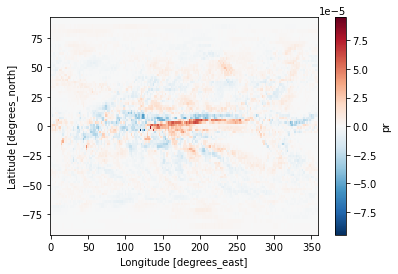

In [52]:
pr.plot()

Se aprecian diferencias entre ambas predicciones de precipitación en todo el globo, pero sobre todo en la zona del ecuador.

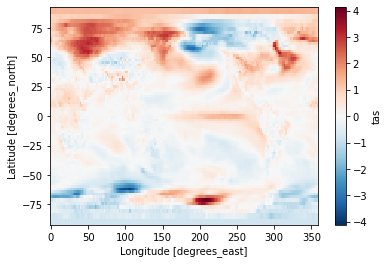

In [53]:
tas.plot()

Las diferencias en temperatura para ambas predicciones son mucho más dispersas, dando diferentes zonas muy destacadas. Sin embargo, al contrario que en el caso de precipitaciones, estas diferencias son más acusadas en las zonas de latitudes medias-altas; es decir, lejos del ecuador.